Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('measures_v2.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
len(data)

9489

In [ ]:
data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17.0
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17.0
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17.0
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17.0
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17.0


# Identify the input and target variables

The output data is described by:
- Motor speed
- Motor torque
- Stator tooth temperature
- Stator yoke temperature
- Stator winding temperature

The input data is described by:
- Voltage q-component
- Voltage d-component
- Current d-component
- Current q-component
- Coolant temperature
- Ambient temperature

# Identify the input and target variables, elaborate the types of the attributes (categorical, numerical, text, integer, real)

In [ ]:
data.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id        float64
dtype: object

# Splitting dataset into Training and Test dataset

In [ ]:
training_set= data[(data['profile_id'] != 65) & (data['profile_id'] != 72) & (data['profile_id'] != 17)& (data['profile_id'] != 80)]
test_set = data[(data['profile_id'] == 65) | (data['profile_id'] == 72)| (data['profile_id'] == 17)| (data['profile_id'] == 80)]
print('The total number of training set is ',len(training_set))
print('The total number of testing  set is ',len(test_set))

The total number of training set is  1
The total number of testing  set is  9488


# Sample distribution across hours of recordings (number of profiles vs duration of recordings) 

In [ ]:
plt.figure(figsize=(15,6))
data['profile_id'].value_counts().sort_values().plot(kind = 'bar')

In [ ]:
sns.jointplot(x='motor_speed', y='torque', data= data)

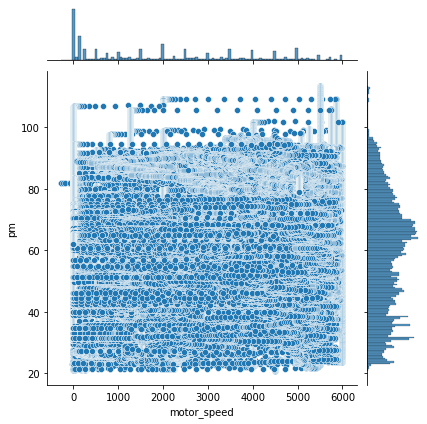

In [ ]:
sns.jointplot(x='motor_speed', y='pm', data= data)

# Correlation between each attribute

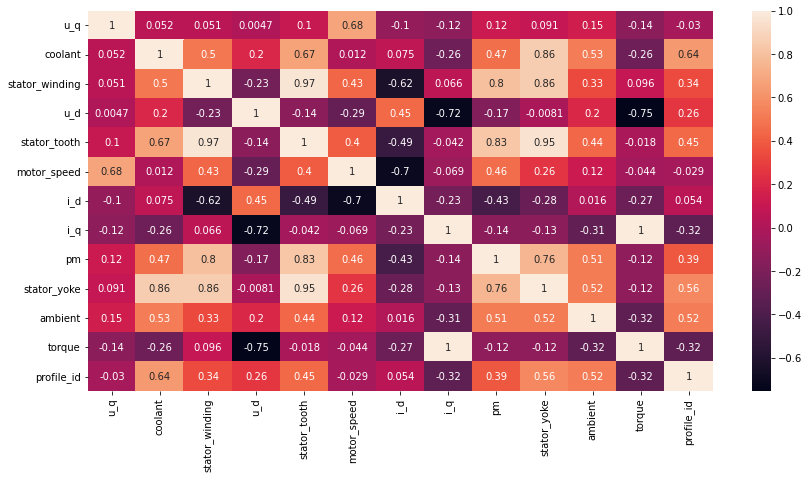

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),annot=True)

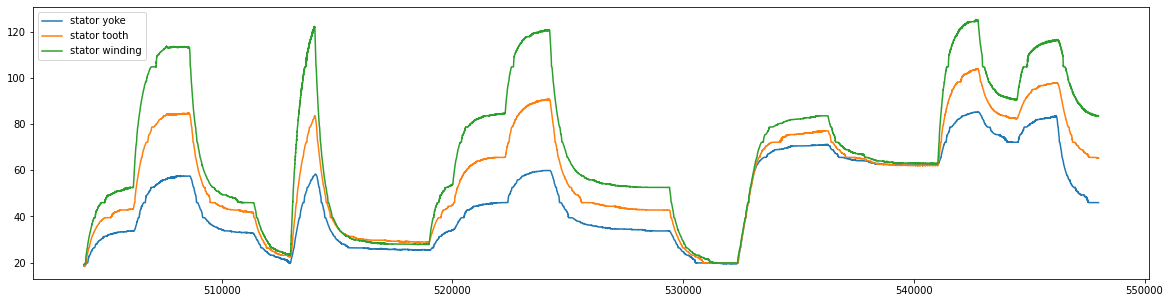

In [ ]:
plt.figure(figsize=(20,5))
data[data['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
data[data['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
data[data['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend()

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data.scatter(),annot=True)

AttributeError: ignored

<Figure size 1008x504 with 0 Axes>

# Distribution and trend plots of each attribute

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


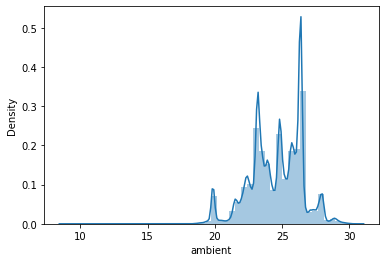

In [ ]:
sns.distplot(data['ambient'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


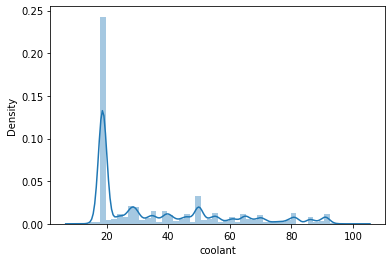

In [ ]:
sns.distplot(data['coolant'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='u_d', ylabel='Density'>

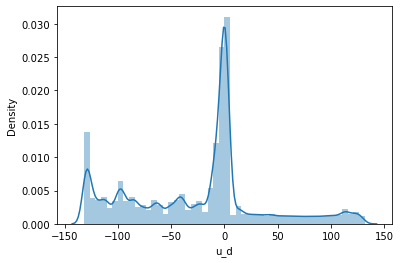

In [ ]:
sns.distplot(data['u_d'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='u_q', ylabel='Density'>

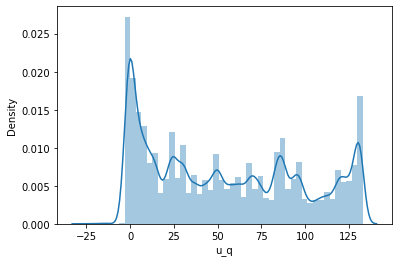

In [ ]:
sns.distplot(data['u_q'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='motor_speed', ylabel='Density'>

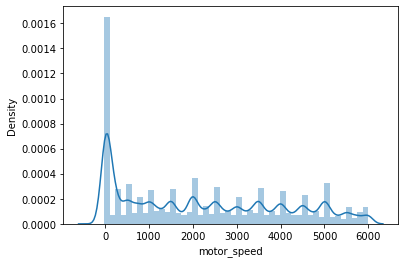

In [ ]:
sns.distplot(data['motor_speed'])

In [ ]:
training_set= data[(data['profile_id'] != 65) & (data['profile_id'] != 72) & (data['profile_id'] != 17)& (data['profile_id'] != 80)]
test_set = data[(data['profile_id'] == 65) | (data['profile_id'] == 72)| (data['profile_id'] == 17)| (data['profile_id'] == 80)]
print('The total number of training set is ',len(training_set))
print('The total number of testing  set is ',len(test_set))

The total number of training set is  1235633
The total number of testing  set is  95183


# Data curation and conditioning: Data preprocessing, data transformation, normalization, augmentation, etc.

## Basic multivariate regression (Base Model)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = training_set.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
X_df_test = test_set.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
mm = MinMaxScaler()
X = mm.fit_transform(X)
X_df_test = mm.fit_transform(X_df_test)
y = data['pm']
y_df_test = test_set['pm']
X = pd.DataFrame(X,columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q',''])
X_df_test = pd.DataFrame(X_df_test,columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q',''])
y.reset_index(drop = True,inplace = True)
y_df_test.reset_index(drop = True,inplace = True)

In [ ]:
print(X.shape)
print(y.shape)

(58770, 8)
(74734,)


In [ ]:
X

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,
0,0.402218,0.211006,0.977561,0.222207,0.997646,0.001624,0.708879,0.000000
1,0.402384,0.210227,0.977392,0.222212,0.997640,0.001639,0.708627,0.000000
2,0.402420,0.209179,0.977301,0.222215,0.997641,0.001640,0.708181,0.000000
3,0.402258,0.207268,0.977490,0.222217,0.997647,0.001632,0.706746,0.000000
4,0.402323,0.203481,0.977299,0.222219,0.997640,0.001642,0.707574,0.000000
...,...,...,...,...,...,...,...,...
58765,0.276812,0.437053,0.036214,0.999997,0.225814,0.430639,0.226200,0.592593
58766,0.276730,0.459122,0.035972,0.999998,0.225710,0.430596,0.226200,0.592593
58767,0.275738,0.474584,0.035950,0.999998,0.225200,0.430560,0.226200,0.592593
58768,0.275836,0.485839,0.035926,0.999999,0.225223,0.430586,0.226200,0.592593


-0.19000482305758734


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


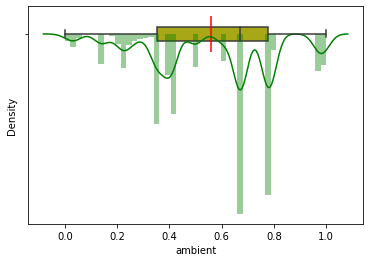

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.3180565086372815


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


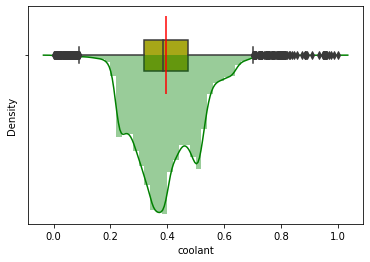

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.00486622762686204


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


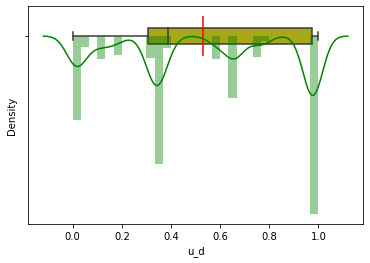

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.6253063721014327


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


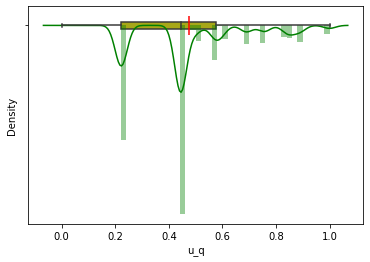

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-1.2620429298822318


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


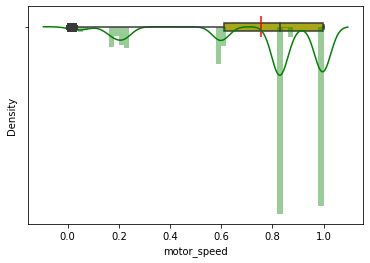

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.12960594974973833


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


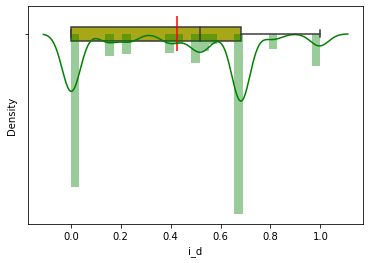

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-1.4759146313382716


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


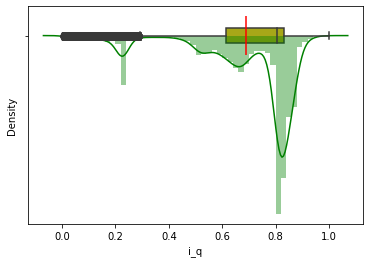

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.3688761842417247


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


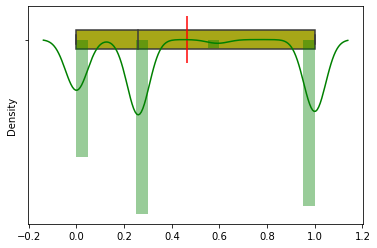

In [ ]:
for i in X.columns:
    print(X[i].skew())
    sns.distplot(X[i],color='g')
    sns.boxplot(X[i],color = 'y')
    plt.vlines(X[i].mean(),ymin = -1,ymax = 1,color = 'r')
    plt.show()

In [ ]:
import scipy.stats as stats
for i in data.columns:
    print(i,' :\nSkew : ',data[i].skew(),' : \nKurtosis : ',data[i].kurt())
    print()

u_q  :
Skew :  -0.22122764062203232  : 
Kurtosis :  -0.667244167338203

coolant  :
Skew :  0.21363427507956023  : 
Kurtosis :  -0.05332711990461014

stator_winding  :
Skew :  1.0529044637012266  : 
Kurtosis :  0.6581842438866006

u_d  :
Skew :  0.01954809793528765  : 
Kurtosis :  -1.513453259425738

stator_tooth  :
Skew :  0.9213120627588743  : 
Kurtosis :  0.39885219814830863

motor_speed  :
Skew :  0.4921117262149142  : 
Kurtosis :  -1.1288239321640154

i_d  :
Skew :  -0.7486525318789117  : 
Kurtosis :  -0.48831389436492767

i_q  :
Skew :  0.21015814472957509  : 
Kurtosis :  -1.3125733132841944

pm  :
Skew :  0.5818919998072382  : 
Kurtosis :  -0.3937878732103015

stator_yoke  :
Skew :  0.85281395973096  : 
Kurtosis :  0.42051477663828596

ambient  :
Skew :  -0.9760072237655724  : 
Kurtosis :  0.9752133739803259

torque  :
Skew :  0.29488776458761384  : 
Kurtosis :  -0.9978140105448055

profile_id  :
Skew :  0.45021006083782905  : 
Kurtosis :  -1.2004761098710601



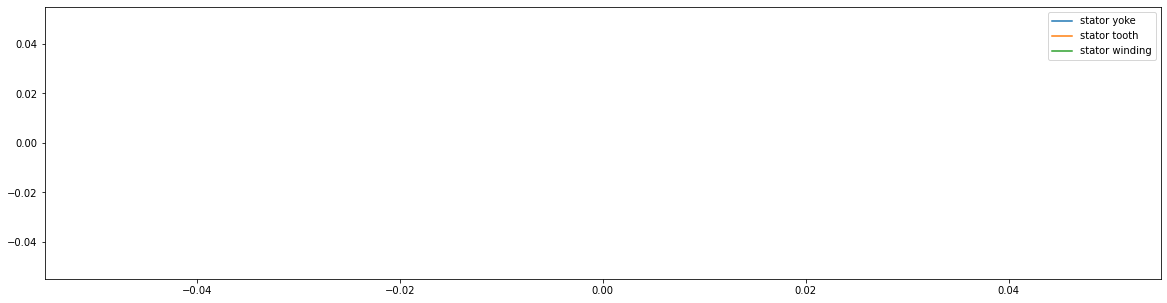

## Linear Regression Model

In [ ]:
# extracting independent variable
X = data.iloc[:,:-1].values
# extracting dependent variable
Y = data.iloc[:,-1].values 
print(X.shape)
print(Y.shape)

(74734, 12)
(74734,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 100)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(931571, 12) (931571,)
(399245, 12) (399245,)


In [ ]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sklearn
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

## Ridge Regression Model


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
ridge = Ridge()

params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5]}

ridge_reg = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv =5)

ridge_reg.fit(X_train, Y_train)
ridge_alpha = ridge_reg.best_params_

print(ridge_alpha['alpha'])
print(ridge_reg.best_score_)

NameError: ignored

In [ ]:
ridge_reg.cv_results_

In [ ]:
ridge_reg_model= Ridge(alpha= 0.01)

ridge_reg_model.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)


#evaulation of the Ridge  
print('Intercept:', ridge_reg_model.intercept_)
print('Coefficients:', ridge_reg_model.coef_)

In [ ]:
df_ridge = evaulation('ridge', y_pred_ridge, y_test)
df_ridge

# Normalization of the dataset

In [ ]:
# bringing all the features into same range to perform valid predictions
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # 0 : 1
X_train =mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)
print(X_train, X_test)

[[0.99218859 0.09009483 0.19656073 ... 0.17163631 0.73067686 0.48473281]
 [0.73508934 0.72337886 0.36918517 ... 0.56453018 0.67585132 0.42247445]
 [0.14695658 0.09814632 0.79121173 ... 0.44789155 0.81992825 0.71293625]
 ...
 [0.91191936 0.60469325 0.67157323 ... 0.72950482 0.80281871 0.43543301]
 [0.17562259 0.12450692 0.86176494 ... 0.53609425 0.60768391 0.70855024]
 [0.46605599 0.26267987 0.28273403 ... 0.32198189 0.68293791 0.48568082]] [[0.18610748 0.06120484 0.00720948 ... 0.00559991 0.49827002 0.48614245]
 [0.5883405  0.45272344 0.59700684 ... 0.56524884 0.64845954 0.78109352]
 [0.98930697 0.44643335 0.48999246 ... 0.51251833 0.63884363 0.47940483]
 ...
 [0.56810644 0.19244074 0.40364621 ... 0.33566622 0.73210866 0.3317575 ]
 [0.7569969  0.77176197 0.66290583 ... 0.80024868 0.72056229 0.59995042]
 [0.24611479 0.06642309 0.16971432 ... 0.09940993 0.48586079 0.68973476]]


Train accuracy: 48.843019671305385
Test accuracy: 39.71853155665632
R^2 score of model is 39.71853155665632 %
Root mean squared error is 19.462155105806414
Mean absolute error is 15.223141728262478
Score Array list: [0.48904656 0.49157007 0.48887098 0.48599372 0.48489497 0.48745887
 0.48949335 0.48811271 0.48876749 0.48991552]


R^2 Score: 39.71853155665632 %


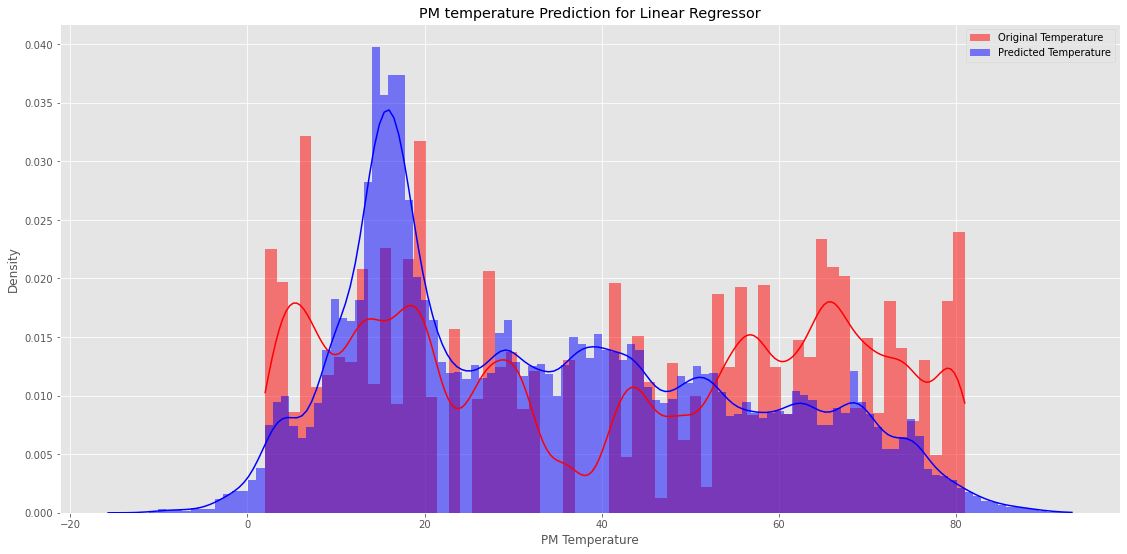

In [ ]:
l_reg = LinearRegression()
l_reg.fit(X_train,Y_train)

l_train_acc = (l_reg.score(X_train,Y_train))*100
l_test_acc = (l_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {l_train_acc}")
# printf("Train accuracy is %f", l_train_acc)
print(f"Test accuracy: {l_test_acc}")
Y_pred = l_reg.predict(X_test)
r2_l = r2_score(Y_test, Y_pred)*100
rms_l = sqrt(mean_squared_error(Y_test, Y_pred))
mae_l = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_l} %")
print(f"Root mean squared error is {rms_l}")
print(f"Mean absolute error is {mae_l}")
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(l_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_l = l_reg.predict(X_test)
r2_l_cv = sklearn.metrics.r2_score(Y_test, Y_pred_cv_l)*100
print(f'R^2 Score: {r2_l_cv} %')
calculation = pd.DataFrame(np.c_[Y_test,l_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for Linear Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()

Train accuracy: 99.549825352233
Test accuracy: 83.84135992932326
(399245,) (399245,)
R^2 score of model is 83.84135992932326 %
Root mean squared error is 10.076307709508205
Mean absolute error is 4.917508797855953
Score Array list: [0.99607236 0.99621223 0.99616919 0.99623975 0.99632937 0.9961364
 0.99610201 0.99629603 0.99625392 0.99639971]


R^2 Score: 83.855978323888 %


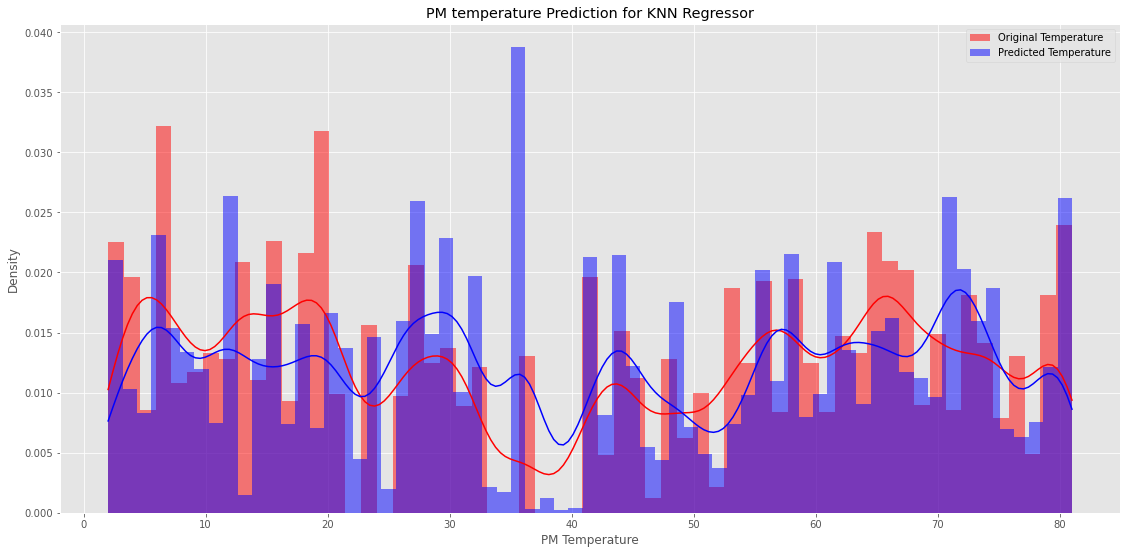

In [ ]:
k_reg = KNeighborsRegressor(n_neighbors=10,p=2,metric='minkowski')
k_reg.fit(X_train,Y_train)

k_train_acc = (k_reg.score(X_train,Y_train))*100
k_test_acc = (k_reg.score(X_test,Y_test))*100

print(f"Train accuracy: {k_train_acc}")
print(f"Test accuracy: {k_test_acc}")
Y_pred = k_reg.predict(X_test)
print(Y_test.shape, Y_pred.shape)
r2_k = r2_score(Y_test, Y_pred)*100
rms_k = sqrt(mean_squared_error(Y_test, Y_pred))
mae_k = mean_absolute_error(Y_test, Y_pred)
print(f"R^2 score of model is {r2_k} %")
print(f"Root mean squared error is {rms_k}")
print(f"Mean absolute error is {mae_k}")
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=100, shuffle=True)
# create model
k_reg = KNeighborsRegressor()
k_reg.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(k_reg, X_train, Y_train, scoring='r2', cv=cv)
print(f'Score Array list: {scores}') 
print('\n')
# report performance
Y_pred_cv_k = k_reg.predict(X_test)
r2_k_cv = sklearn.metrics.r2_score(Y_test, Y_pred_cv_k)*100
print(f'R^2 Score: {r2_k_cv} %')
calculation = pd.DataFrame(np.c_[Y_test,k_reg.predict(X_test)], columns = ["Original Temperature","Predicted Temperature"])
calculation.head(5)
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sns.histplot(Y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original Temperature')
sns.histplot(Y_pred, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted Temperature')
plt.legend(loc = 'upper right') 
plt.title("PM temperature Prediction for KNN Regressor") 
plt.xlabel("PM Temperature")
plt.ylabel("Density")
plt.show()